# MLDS - Supervised Learning

## Authors:
### . Jamal Aourraz
### . Zakaria Hajji

## Data Preparation

In [11]:
library(FactoMineR) #PCA
library(MASS) #QDA & LNR
library(rpart) #CART
library(e1071) #SVM & NB
library(class) #KNN
library(randomForest) #RF
library(stats)# LGR
library(caret) #ConfusionMatrix
library(ROCR) #ROC (AUC)

In [2]:
data<-read.table("creditcard.csv",sep = ",",header=T)

In [3]:
data[1:10,]

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.53634674,1.3781552,-0.33832077,0.46238778,0.239598554,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.12853936,-0.18911484,0.133558377,-0.021053053,149.62,0
0,1.1918571,0.26615071,0.16648011,0.4481541,0.06001765,-0.08236081,-0.078802983,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.16717040,0.12589453,-0.008983099,0.014724169,2.69,0
1,-1.3583541,-1.34016307,1.77320934,0.3797796,-0.50319813,1.80049938,0.791460956,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.32764183,-0.13909657,-0.055352794,-0.059751841,378.66,0
1,-0.9662717,-0.18522601,1.79299334,-0.8632913,-0.01030888,1.24720317,0.237608940,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.64737603,-0.22192884,0.062722849,0.061457629,123.50,0
2,-1.1582331,0.87773675,1.54871785,0.4030339,-0.40719338,0.09592146,0.592940745,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.20600959,0.50229222,0.219422230,0.215153147,69.99,0
2,-0.4259659,0.96052304,1.14110934,-0.1682521,0.42098688,-0.02972755,0.476200949,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.23279382,0.10591478,0.253844225,0.081080257,3.67,0
4,1.2296576,0.14100351,0.04537077,1.2026127,0.19188099,0.27270812,-0.005159003,0.08121294,0.4649600,⋯,-0.167716266,-0.270709726,-0.15410379,-0.78005542,0.75013694,-0.25723685,0.034507430,0.005167769,4.99,0
7,-0.6442694,1.41796355,1.07438038,-0.4921990,0.94893409,0.42811846,1.120631358,-3.80786424,0.6153747,⋯,1.943465340,-1.015454710,0.05750353,-0.64970901,-0.41526657,-0.05163430,-1.206921081,-1.085339188,40.80,0
7,-0.8942861,0.28615720,-0.11319221,-0.2715261,2.66959866,3.72181806,0.370145128,0.85108444,-0.3920476,⋯,-0.073425100,-0.268091632,-0.20423267,1.01159180,0.37320468,-0.38415731,0.011747356,0.142404330,93.20,0
9,-0.3382618,1.11959338,1.04436655,-0.2221873,0.49936081,-0.24676110,0.651583206,0.06953859,-0.7367273,⋯,-0.246913937,-0.633752642,-0.12079408,-0.38504993,-0.06973305,0.09419883,0.246219305,0.083075649,3.68,0


In [5]:
datad=data[,-which(names(data) %in% c("Time","Amount","Class"))]

In [7]:
classes=as.factor(data[,"Class"])

In [9]:
unique(classes)

[1] 0 1
Levels: 0 1

## Exploratory Analysis

### Variables

In [4]:
str(data)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

### Variables Statistics

In [5]:
summary(data)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

### Boxplots

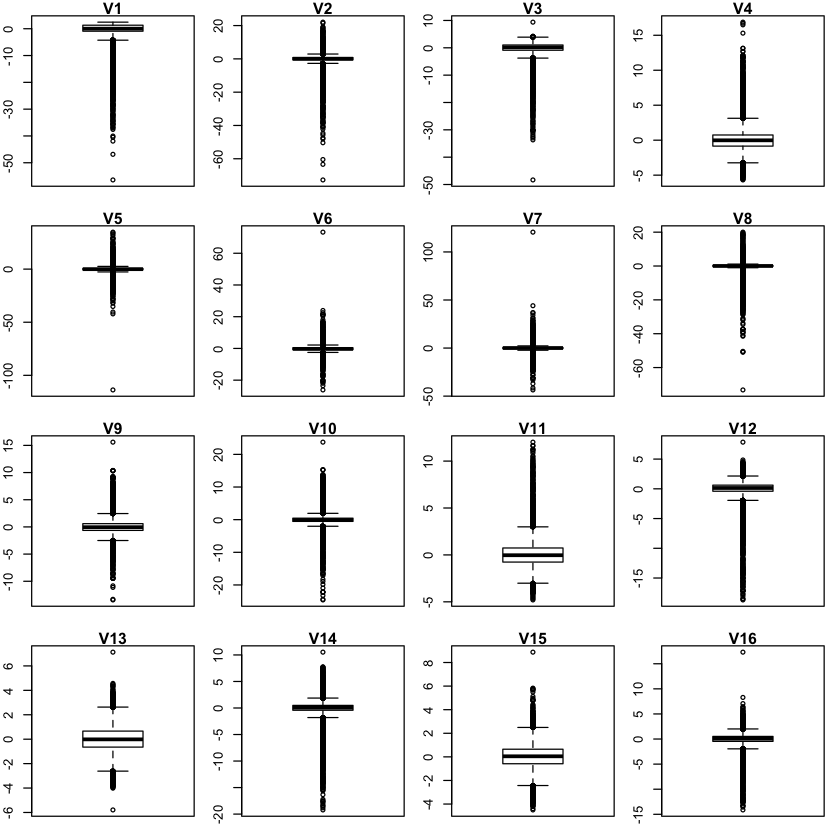

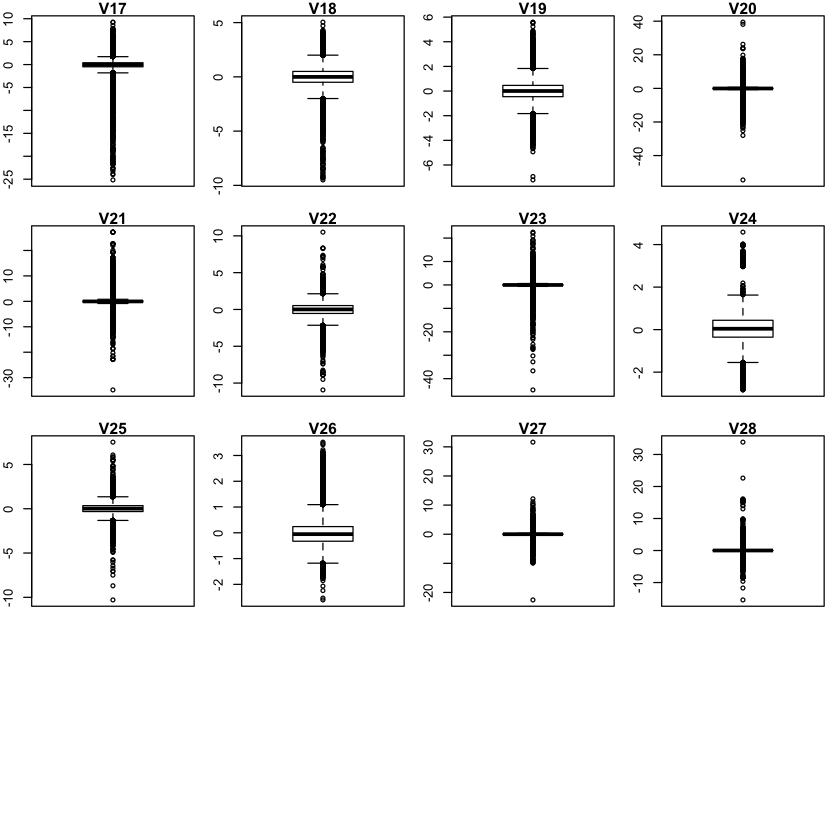

In [47]:
par(mfrow=c(4,4))
par(mar = c(1.5,2,1,1))
for (i in 1:length(datad)){
    boxplot(datad[,i],main=names(datad)[i],pars = list(boxwex = 0.8, staplewex = 0.5, outwex = 0.5))
}

### Histograms

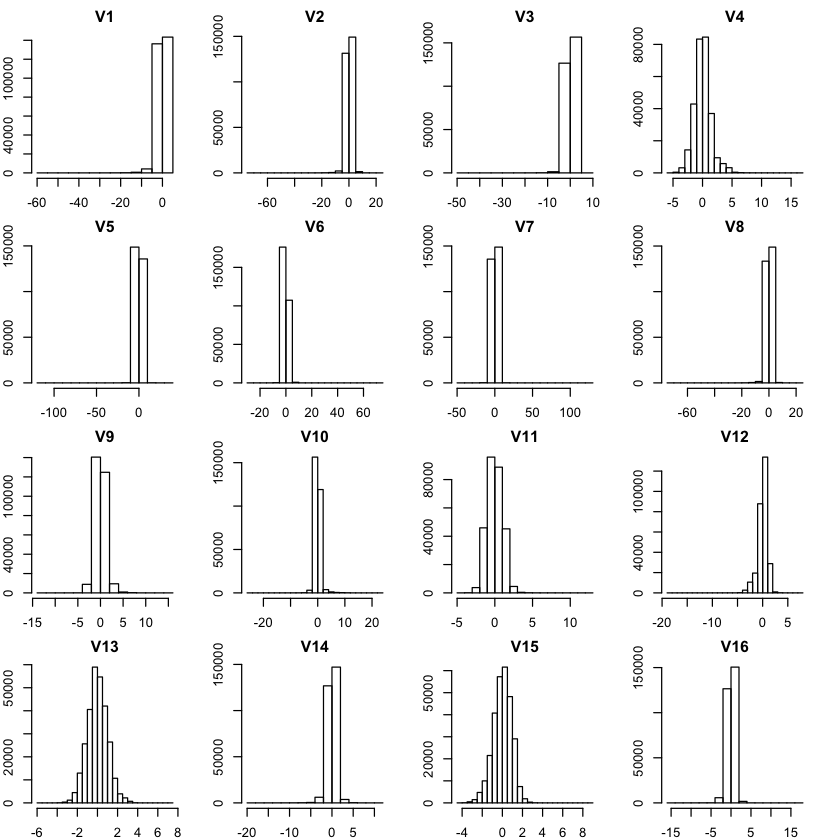

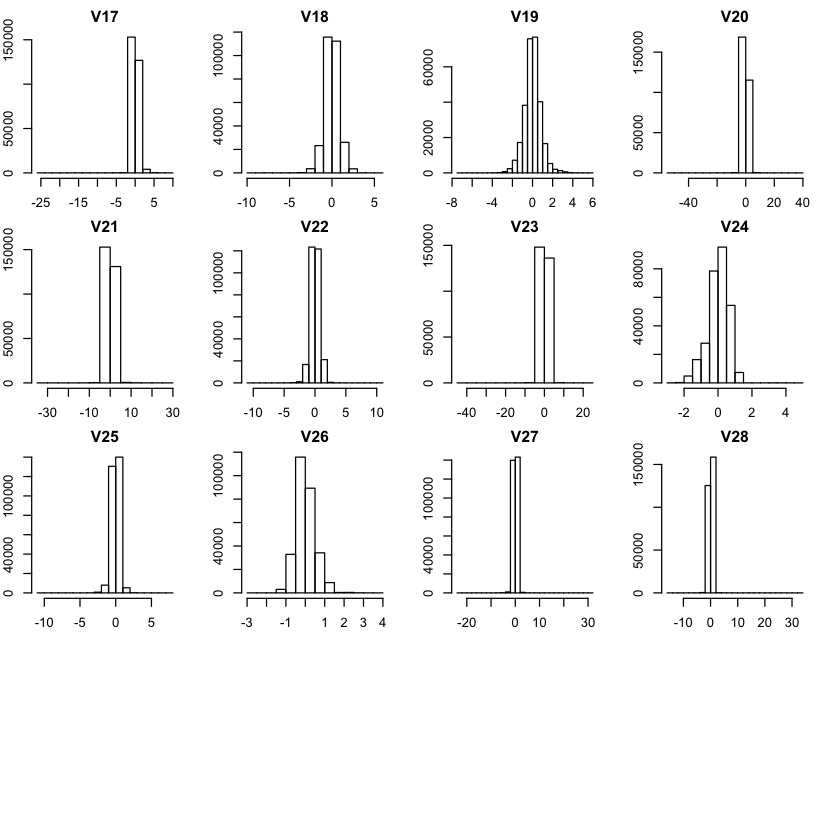

In [59]:
par(mfrow=c(4,4))
par(mar = c(2,2,2,2))
for (i in 1:length(datad)){
    hist(datad[,i],xlab="",ylab="",main = names(datad)[i])
}

### Balanced or Imbalanced Data?

In [71]:
t(summary(classes))

0,1
284315,492


### Under-sampling

In [3]:
data_class_0=data[which(data$Class=="0"),]
data_class_1=data[which(data$Class=="1"),]

In [4]:
data_us <- rbind(data_class_0[sample(1:nrow(data_class_0), 492,replace=FALSE),],data_class_1)

In [6]:
summary(as.factor(data_us$Class))

0   1 
492 492

In [174]:
data_us[data_us$Class=='0',][1:5,]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
214662,139766,1.413907,-0.3537552,-0.96180432,4.0707239,0.3615376,0.6791357,0.4322485,-0.02120647,-0.8476271,⋯,0.25053799,0.5012762,-0.25931280,-0.34039232,0.2477454,0.16786224,-0.067914362,-0.02732455,246.54,0
199446,132971,2.018289,-0.5906808,-0.47834733,0.3616218,-0.6842295,-0.1186329,-0.8525991,0.16164674,1.5662579,⋯,0.11710141,0.4379580,0.20233969,0.57927957,-0.3005676,0.55204529,-0.036460332,-0.04662082,5.74,0
109000,71170,1.353163,-1.0976050,-0.07289461,-1.4773871,-1.1025071,-0.7052973,-0.5314172,-0.21795531,-2.4208612,⋯,-0.47976484,-1.2695512,0.07819773,-0.04616495,0.2290527,-0.53589909,-0.008999326,0.02145562,99.60,0
102884,68411,1.038111,-0.3561030,1.17306529,1.8214050,-1.0686770,0.1101982,-0.4987008,0.21877004,1.4738183,⋯,-0.43389383,-0.9777502,0.03468248,0.35476580,0.4326905,-0.53910420,0.056974587,0.03654162,53.96,0
141192,84167,-1.178270,1.4556282,0.84207154,-0.1222254,-0.5462887,-0.7958899,0.2524025,0.41629599,-0.3659460,⋯,-0.05685516,-0.2885147,0.19495040,0.50326376,-0.8596430,-0.08713592,0.095276520,0.23373571,16.99,0


In [175]:
data_us[data_us$Class=='1',][1:5,]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
542,406,-2.312227,1.951992,-1.6098507,3.997906,-0.5221879,-1.42654532,-2.5373873,1.39165725,-2.7700893,⋯,0.5172324,-0.03504937,-0.4652111,0.32019820,0.04451917,0.1778398,0.26114500,-0.14327587,0.00,1
624,472,-3.043541,-3.157307,1.0884628,2.288644,1.3598051,-1.06482252,0.3255743,-0.06779365,-0.2709528,⋯,0.6616959,0.43547721,1.3759657,-0.29380315,0.27979803,-0.1453617,-0.25277312,0.03576423,529.00,1
4921,4462,-2.303350,1.759247,-0.3597447,2.330243,-0.8216283,-0.07578757,0.5623198,-0.39914658,-0.2382534,⋯,-0.2941663,-0.93239106,0.1727263,-0.08732954,-0.15611426,-0.5426279,0.03956599,-0.15302880,239.93,1
6109,6986,-4.397974,1.358367,-2.5928442,2.679787,-1.1281309,-1.70653639,-3.4961973,-0.24877774,-0.2477679,⋯,0.5735741,0.17696772,-0.4362069,-0.05350186,0.25240526,-0.6574878,-0.82713571,0.84957338,59.00,1
6330,7519,1.234235,3.019740,-4.3045969,4.732795,3.6242008,-1.35774566,1.7134450,-0.49635849,-1.2828578,⋯,-0.3790683,-0.70418103,-0.6568048,-1.63265296,1.48890145,0.5667973,-0.01001622,0.14679273,1.00,1


In [5]:
datad_us=data_us[,-which(names(data_us) %in% c("Time","Amount"))]

In [6]:
datad_us_sample=sample(nrow(datad_us),round(nrow(datad_us)*0.75),replace = FALSE)

In [7]:
datad_us_train=datad_us[datad_us_sample,]
datad_us_test=datad_us[-datad_us_sample,]

In [10]:
length(datad_us_test)

[1] 29

### Oversampling

In [185]:
library("ROSE")

In [215]:
data_balanced = ovun.sample(Class~.,data = data, method = "under", p = 0.5,seed = 1)$data

In [216]:
summary(as.factor(data_balanced$Class))

0   1 
474 492

In [217]:
### Train and test Splitting
## Sampling data 0.75 Training, 0.25 Test
Sampeled_data=sample(nrow(data_balanced),round(nrow(data_balanced)*0.75),replace = FALSE)
Data_train=data_balanced[Sampeled_data,];
Data_test=data_balanced[-Sampeled_data,];

In [237]:
## Fitting LR Model
fit.lm=glm(Class~., data = Data_train, family = quasibinomial)
summary(fit.lm)


Call:
glm(formula = Class ~ ., family = quasibinomial, data = Data_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3046  -0.1607   0.0000   0.0000   3.4935  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.312e+01  3.395e+01  -0.386  0.69932   
Time        -1.288e-05  8.624e-06  -1.494  0.13564   
V1          -1.557e+01  1.015e+01  -1.534  0.12549   
V2           4.401e+01  4.980e+01   0.884  0.37709   
V3          -5.712e+01  2.376e+01  -2.404  0.01649 * 
V4           3.850e+01  1.774e+01   2.171  0.03028 * 
V5          -3.165e+01  1.128e+01  -2.805  0.00517 **
V6          -2.276e+01  2.263e+01  -1.006  0.31491   
V7          -1.014e+02  7.876e+01  -1.287  0.19859   
V8           1.867e+01  1.364e+01   1.368  0.17163   
V9          -4.479e+01  2.507e+01  -1.786  0.07446 . 
V10         -1.033e+02  5.776e+01  -1.789  0.07409 . 
V11          7.515e+01  4.794e+01   1.568  0.11741   
V12         -1.358e+02  8.607e+01  -1.57

In [238]:
fit.pred=predict(fit.lm,newdata = Data_test[,-31],type = "response")
fit.pred=ifelse(fit.pred>0.5,1,0)
lm.cf=length(which(fit.pred==Data_test$Class))
lm.cf=lm.cf/nrow(Data_test)

In [239]:
lm.cf

[1] 0.9421488

In [228]:
##### CART RANDOM FORREST #####
r.ctrl <- rpart.control(minsplit = 100,
                        minbucket = 10,
                        cp = 0,
                        xval = 10
)

cart.train <- Data_train
names(cart.train)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [229]:
model_t <- rpart(formula = Class~.,
            data = cart.train[,-c(1,11)],
            method = "class",
            control = r.ctrl
)


Classification tree:
rpart(formula = Class ~ ., data = cart.train[, -c(1, 11)], method = "class", 
    control = r.ctrl)

Variables actually used in tree construction:
[1] V14 V17

Root node error: 350/724 = 0.48343

n= 724 

        CP nsplit rel error  xerror     xstd
1 0.808571      0   1.00000 1.00000 0.038418
2 0.028571      1   0.19143 0.22000 0.023701
3 0.017143      2   0.16286 0.21714 0.023564
4 0.000000      3   0.14571 0.24000 0.024620


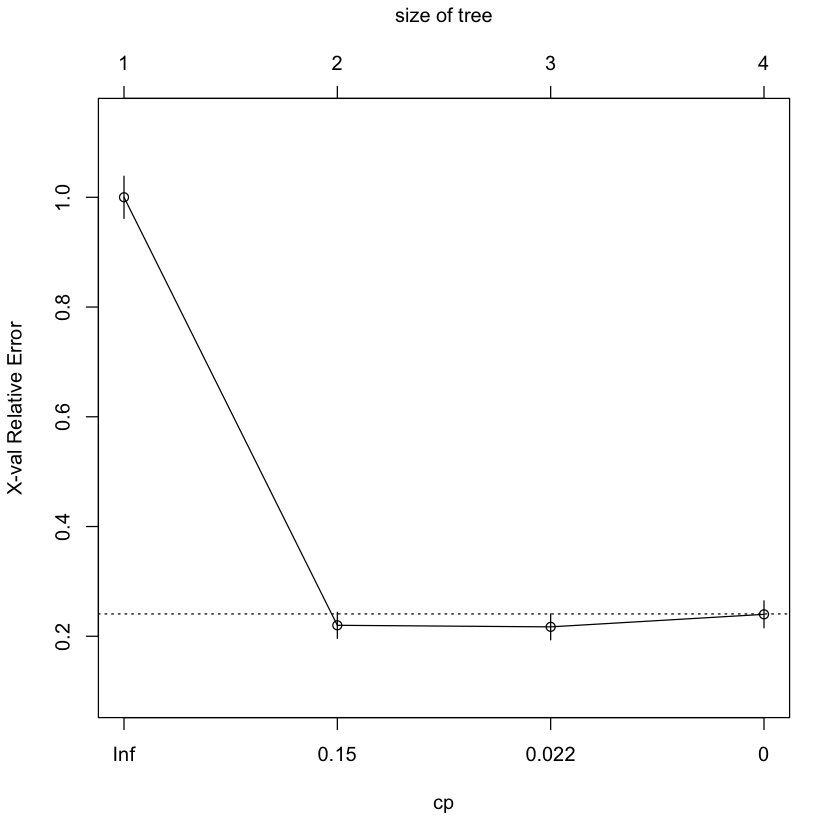

In [230]:
##  fancyRpartPlot(model_t)   ; ## Display tree model
printcp(model_t) 
plotcp(model_t) 

### KNN

In [45]:
knn <- knn(train = datad_us_train[,-29], test = datad_us_test[,-29], cl = datad_us_train$Class, k = 5)

In [46]:
confusionMatrix(knn, as.factor(datad_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 128  14
         1   2 102
                                          
               Accuracy : 0.935           
                 95% CI : (0.8965, 0.9624)
    No Information Rate : 0.5285          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8688          
 Mcnemar's Test P-Value : 0.00596         
                                          
            Sensitivity : 0.8793          
            Specificity : 0.9846          
         Pos Pred Value : 0.9808          
         Neg Pred Value : 0.9014          
             Prevalence : 0.4715          
         Detection Rate : 0.4146          
   Detection Prevalence : 0.4228          
      Balanced Accuracy : 0.9320          
                                          
       'Positive' Class : 1               
                                          

In [47]:
as.numeric(as.character(knn))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
[186] 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1

In [48]:
as.numeric(datad_us_test$Class)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [49]:
roc_pred_knn=prediction(as.numeric(as.character(knn)),datad_us_test$Class)

In [50]:
roc_pref_knn=performance(roc_pred_knn,measure = "tpr", x.measure = "fpr")

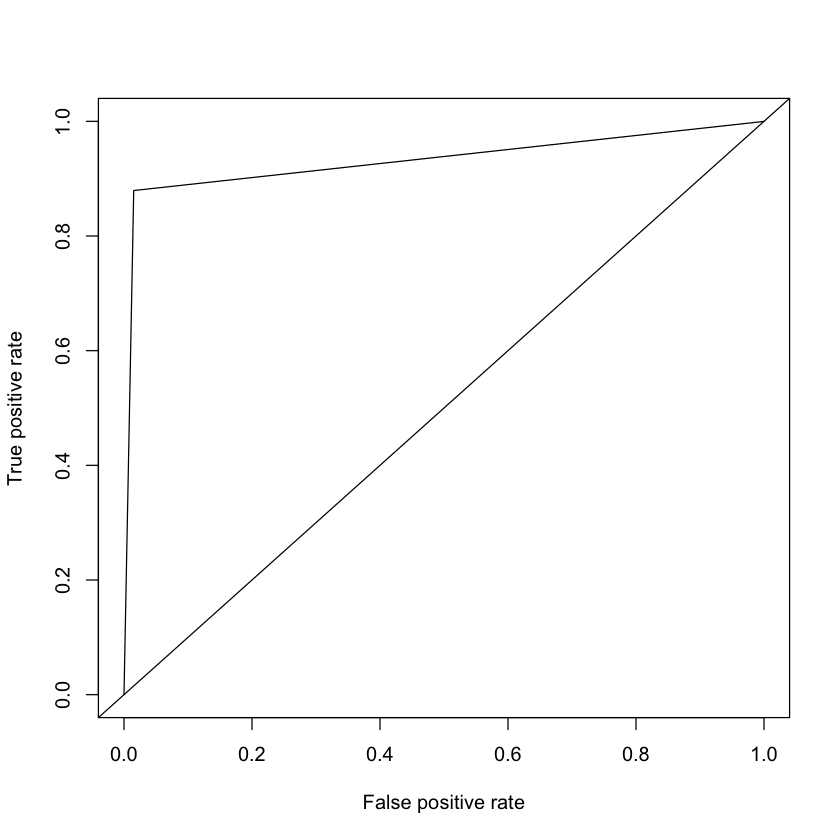

In [51]:
plot(roc_pref_knn)
abline(a=0, b= 1)

In [54]:
auc_perf_knn = performance(roc_pred_knn, measure = "auc")
as.numeric(auc_perf_knn@y.values)

[1] 0.9319629

### Naive Bayess

In [12]:
bayes <- naiveBayes(as.factor(datad_us_train$Class)~., data = datad_us_train, laplace = 1,)
bayes$apriori

Y
  0   1 
362 376 

In [13]:
summary(bayes)

        Length Class  Mode     
apriori  2     table  numeric  
tables  28     -none- list     
levels   2     -none- character
call     5     -none- call     

In [14]:
pred <- predict(bayes, datad_us_test)

In [15]:
pred

[1] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
[186] 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1
Levels: 0 1

In [16]:
confusionMatrix(pred, as.factor(datad_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 127  16
         1   3 100
                                         
               Accuracy : 0.9228         
                 95% CI : (0.882, 0.9529)
    No Information Rate : 0.5285         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8441         
 Mcnemar's Test P-Value : 0.005905       
                                         
            Sensitivity : 0.8621         
            Specificity : 0.9769         
         Pos Pred Value : 0.9709         
         Neg Pred Value : 0.8881         
             Prevalence : 0.4715         
         Detection Rate : 0.4065         
   Detection Prevalence : 0.4187         
      Balanced Accuracy : 0.9195         
                                         
       'Positive' Class : 1              
                                         

In [41]:
roc_pred_nb=prediction(as.numeric(as.character(pred)),datad_us_test$Class)

In [42]:
roc_pref_nb=performance(roc_pred_nb,measure = "tpr", x.measure = "fpr")

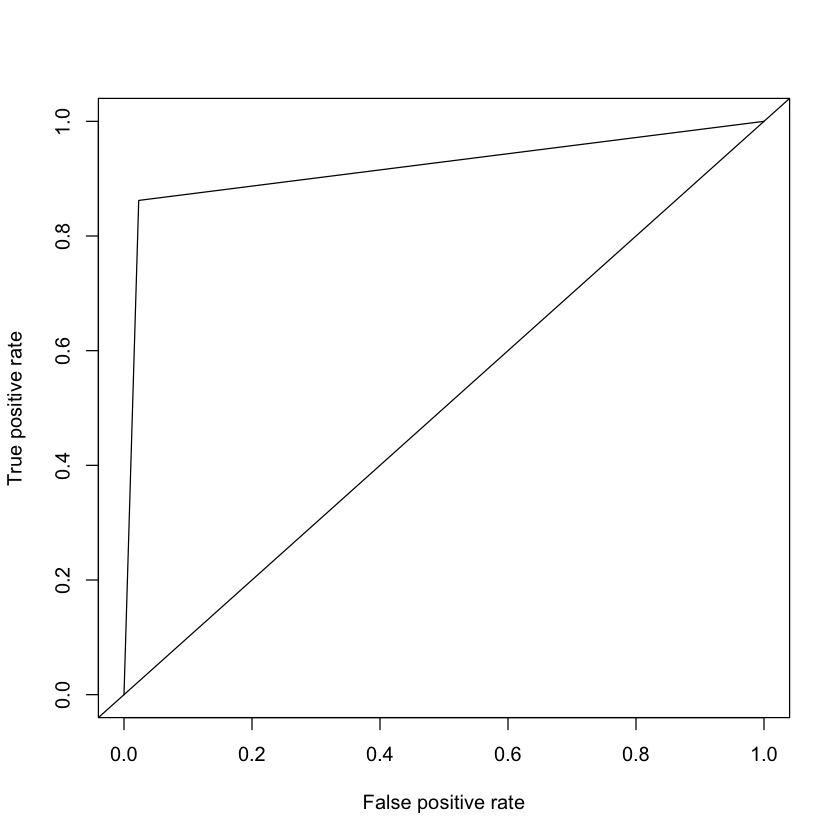

In [43]:
plot(roc_pref_nb)
abline(a=0, b= 1)

In [53]:
auc_perf_nb = performance(roc_pred_nb, measure = "auc")
as.numeric(auc_perf_nb@y.values)

[1] 0.919496